# Analyzing Data

Analysing data from https://www.anime-planet.com/manga/all that was webscrapped in a seperate file and then cleaned.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read file

df = pd.read_csv('manga_planet_data_fully_cleaned_v1.csv')


In [3]:
# Data Summary

df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71773 entries, 0 to 71772
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         71773 non-null  float64
 1   title        71773 non-null  object 
 2   description  71742 non-null  object 
 3   volume       53172 non-null  float64
 4   publisher    71773 non-null  object 
 5   year         70947 non-null  float64
 6   rating       30190 non-null  float64
 7   tags         71773 non-null  object 
 8   chapter      52063 non-null  float64
dtypes: float64(5), object(4)
memory usage: 4.9+ MB


rank               0
title              0
description       31
volume         18601
publisher          0
year             826
rating         41583
tags               0
chapter        19710
dtype: int64

In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71773 entries, 0 to 71772
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         71773 non-null  float64
 1   title        71773 non-null  object 
 2   description  71742 non-null  object 
 3   volume       53172 non-null  float64
 4   publisher    71773 non-null  object 
 5   year         70947 non-null  float64
 6   rating       30190 non-null  float64
 7   tags         71773 non-null  object 
 8   chapter      52063 non-null  float64
dtypes: float64(5), object(4)
memory usage: 4.9+ MB


,rank,volume,year,rating,chapter
count,71773.000000,53172.00000,70947.000000,30190.000000,52063.000000
mean,35887.000000,3.31400,2011.871284,3.786479,55.425196
std,20719.224772,5.40325,9.027327,0.401185,214.294824
min,1.000000,1.00000,1926.000000,2.000000,1.000000
25%,17944.000000,1.00000,2008.000000,3.500000,7.000000
50%,35887.000000,1.00000,2014.000000,3.800000,16.000000
75%,53830.000000,3.00000,2018.000000,4.100000,46.000000
max,71773.000000,202.00000,2022.000000,4.800000,11828.000000


In [5]:
# Deal with null values

df['description'].replace(np.nan, 'None', inplace=True)
df.fillna(0, inplace=True)


In [ ]:
# Used to convert tags into workable code

df['tags']= df['tags'].apply(eval)

In [6]:
# Changing types. Choose just to change calander for visual purposes. Removed trailing zero.

# df['rank']= df['rank'].astype('Int64')
# df['volume']= df['volume'].astype('Int64')
df['year']= df['year'].astype('Int32')
# df['chapter'] = df['chapter'].astype('Int64')

df.dtypes

rank           float64
title           object
description     object
volume         float64
publisher       object
year             Int32
rating         float64
tags            object
chapter        float64
dtype: object

In [7]:
# Check for duplicates 

df.duplicated().value_counts()

False    71773
dtype: int64

In [13]:
# Get top 100 series
rank = 100
top_series = df.loc[df['rank'] <= rank]

#top_series.replace(np.nan, 0, inplace=True)

In [14]:
# Find inforamtion about top series.

# Average number of volumes
avg_volumes = round(top_series['volume'].mean(),0)

# Average number of chapter 
avg_chapters= round(top_series['chapter'].mean(),0)
# Average Rating of series
avg_rating = round(top_series['rating'].mean(),3)
# Years they were published in
top_years=top_series['year'].value_counts()
# Publishers of top series
top_publishers=top_series['publisher'].value_counts()

Working with tags. Code inpired by https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

In [11]:
# Function to return a series for tags column

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])
    

In [25]:
# Check tags value counts

tags=to_1D(df["tags"]).value_counts()
top_series_tags=to_1D(top_series['tags']).value_counts()

In [31]:
df_expanded =df['tags'].apply(pd.Series)
top_series_expanded=top_series['tags'].apply(pd.Series)

In [32]:
df_expanded.iloc[:,0].value_counts(normalize=True)
top_series_expanded.iloc[:,0].value_counts(normalize=True)

Action       0.39
Comedy       0.24
Drama        0.14
BL           0.12
Fantasy      0.04
Adventure    0.04
4-koma       0.01
Romance      0.01
Mystery      0.01
Name: 0, dtype: float64

In [28]:
# Function which takes a list and its unique keys and uses True or False to indicate whether the key is in the list.

def boolean_df(item_lists, unique_items):
    bool_dict ={}
    
    for i, item in enumerate(unique_items):
        
        bool_dict[item] = item_lists.apply(lambda x: item in x)
    return pd.DataFrame(bool_dict)

In [36]:
df_bool = boolean_df(df['tags'],tags.keys())
top_series_bool = boolean_df(top_series['tags'],top_series_tags.keys())

In [37]:
# Checks correlation between tags

tags_corr = df_bool.corr()
top_series_corr = top_series_bool.corr()

In [38]:
# Find when tags co-occur

df_int = df_bool.astype(int)
top_series_int = top_series_bool.astype(int)

In [41]:
# Creates Matrix of items co-occuring

df_freq_mat = np.dot(df_int.T, df_int)
top_series_freq_mat = np.dot(top_series_int.T, top_series_int)

In [42]:
# Creates a Dataframe with how many times tags co-occur

df_freq =pd.DataFrame(df_freq_mat, columns=tags.keys(), index = tags.keys())
top_series_freq = pd.DataFrame(top_series_freq_mat, columns= top_series_tags.keys(), index=top_series_tags.keys())

# Visualizations

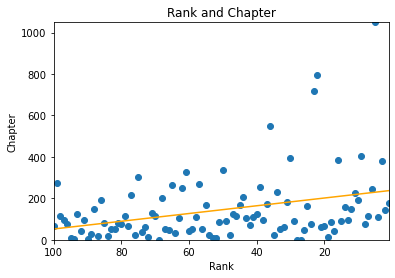

In [16]:
# Do some visualizations
x =top_series['rank']
y =top_series['chapter']
z = np.polyfit(x,y,1)
p = np.poly1d(z)

plt.scatter(x,y)
plt.plot(x,p(x),color='orange' )
plt.title('Rank and Chapter')
plt.xlabel('Rank')
plt.ylabel('Chapter')
plt.axis([max(x),min(x),min(y),max(y)])
plt.show()

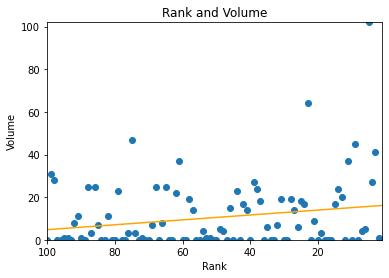

In [17]:
# Do some visualizations
x =top_series['rank']
y =top_series['volume']
z = np.polyfit(x,y,1)
p = np.poly1d(z)

plt.scatter(x,y)
plt.plot(x,p(x), color='orange')
plt.title('Rank and Volume')
plt.xlabel('Rank')
plt.ylabel('Volume')
plt.axis([max(x),min(x),min(y),max(y)])
plt.show()

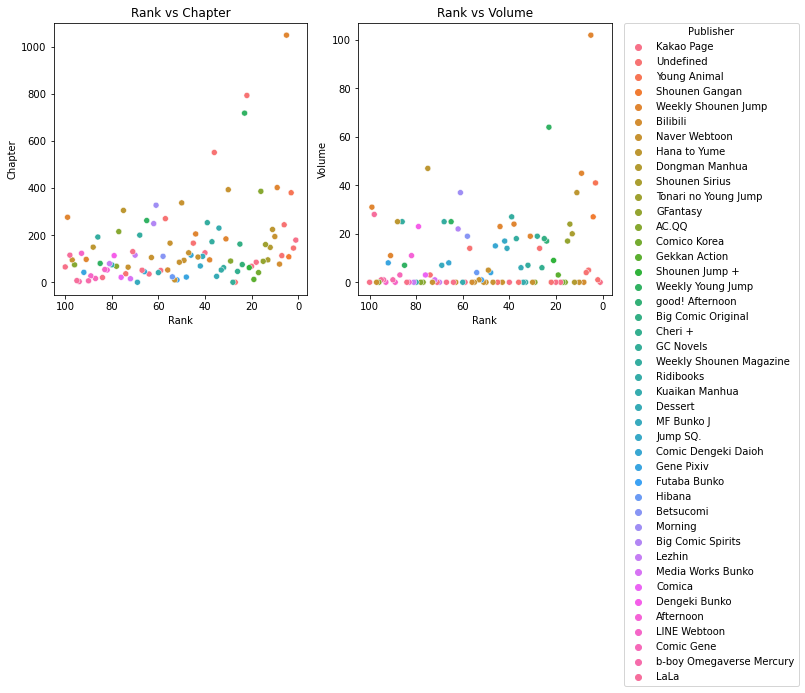

In [18]:
# Seaborn versions

fig, (plot1,plot2) = plt.subplots(1,2, figsize=(10,5))


sns.scatterplot(ax=plot1, data=top_series, x='rank',y="chapter", hue="publisher",legend=False )
sns.scatterplot(ax=plot2, data=top_series, x='rank',y="volume", hue="publisher", )
plt.legend(title="Publisher",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plot1.invert_xaxis()
plot2.invert_xaxis()
plot1.set_title('Rank vs Chapter')
plot2.set_title('Rank vs Volume')
plot1.set_xlabel('Rank')
plot1.set_ylabel('Chapter')
plot2.set_xlabel('Rank')
plot2.set_ylabel('Volume')

plt.show()

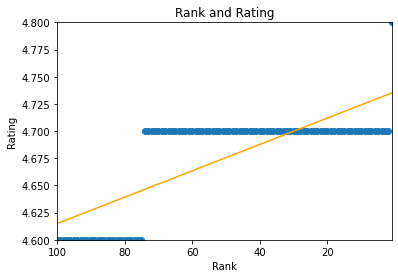

In [19]:
# Do some visualizations
x =top_series['rank']
y =top_series['rating']
z = np.polyfit(x,y,1)
p = np.poly1d(z)

plt.scatter(x,y)
plt.plot(x,p(x), color='orange')
plt.title('Rank and Rating')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.axis([max(x),min(x),min(y),max(y)])
plt.show()

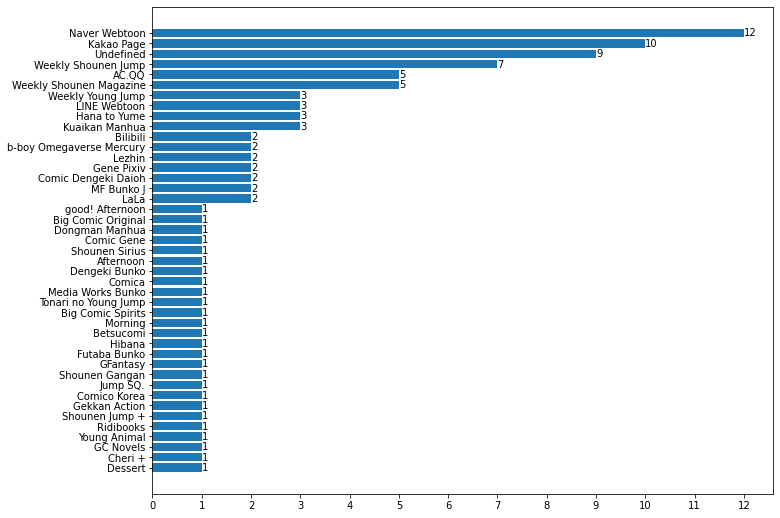

In [20]:
xticks = list(i for i in range(0,max(top_publishers.values) +1))

fig, ax =plt.subplots()
fig.tight_layout(pad=-11)
bars =ax.barh(top_publishers.index, top_publishers.values)
ax.bar_label(bars)
ax.invert_yaxis()
ax.set_xticks(xticks)
plt.show()

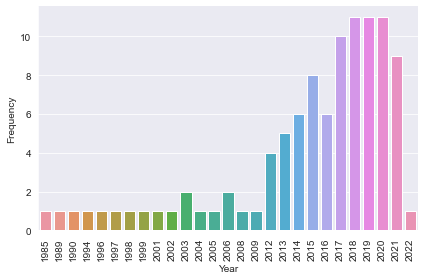

In [22]:
# Seaborn Bar Chart

sns.set_style("darkgrid")
sns.countplot(data=top_series, x='year', )
sns.despine()

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

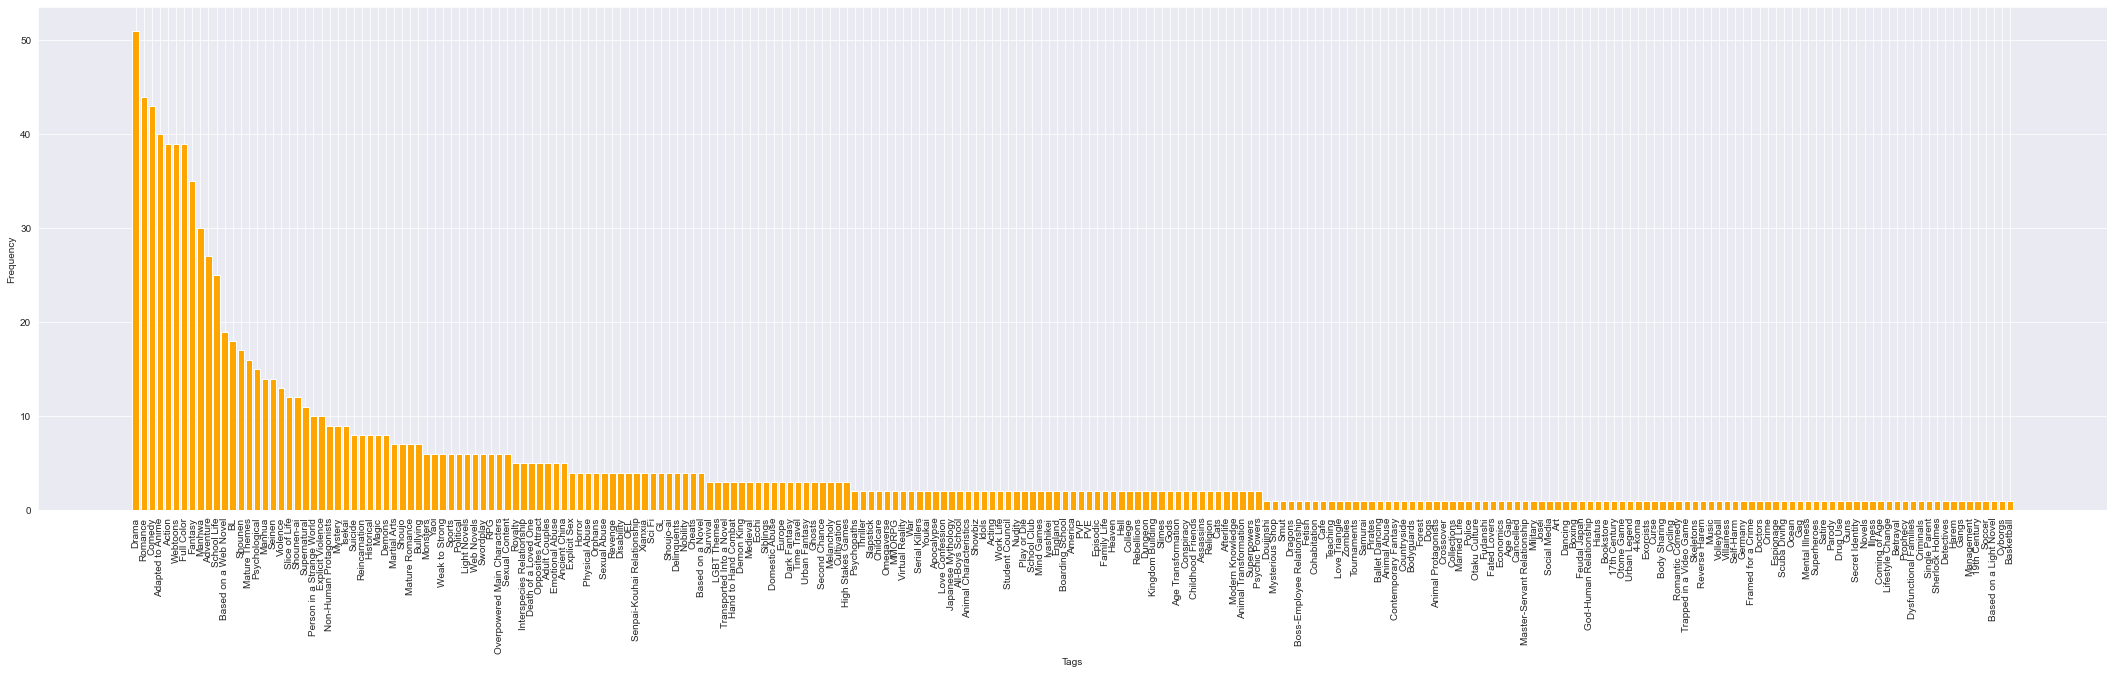

In [23]:
# Visualizing tag appearences throughout top series

fig, ax = plt.subplots(figsize=(25,5))
ax.bar(top_series_tags.index,top_series_tags.values, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Frequency')
fig.tight_layout(pad=-15)
plt.show()

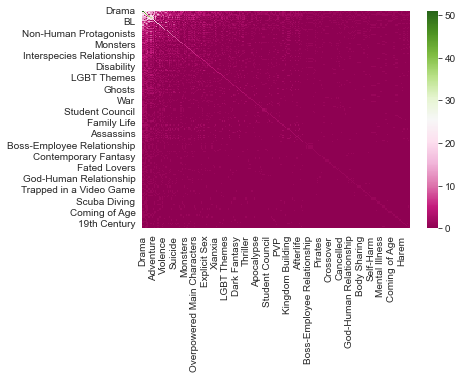

In [46]:
fig, ax = plt.subplots()

sns.heatmap(top_series_freq, cmap="PiYG")
plt.xticks(rotation=90)
plt.show()